In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/housePrice.csv")
df.head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [ ]:
df = df.shape
df

(3479, 8)

In [ ]:
df = df.dtypes
df

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [ ]:
df['Area'] = df['Area'].replace({',': ''}, regex=True)
df['Area'] = df['Area'].astype(int)


In [ ]:
df = df.dtypes
df

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [ ]:
columns = df.columns.tolist()
columns.pop(columns.index("Address"))
columns.insert(0, "Address")
df = df[columns]
df.head(5)

,Address,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,Shahran,63,1,True,True,True,1.850000e+09,61666.67
1,Shahran,60,1,True,True,True,1.850000e+09,61666.67
2,Pardis,79,2,True,True,True,5.500000e+08,18333.33
3,Shahrake Qods,95,2,True,True,True,9.025000e+08,30083.33
4,Shahrake Gharb,123,2,True,True,True,7.000000e+09,233333.33


In [ ]:
columns = df.columns.tolist()
columns.pop(columns.index("Price(USD)"))
columns.insert(6, "Price(USD)")
df = df[columns]
df.head(5)

,Address,Area,Room,Parking,Warehouse,Elevator,Price(USD),Price
0,Shahran,63,1,True,True,True,61666.67,1.850000e+09
1,Shahran,60,1,True,True,True,61666.67,1.850000e+09
2,Pardis,79,2,True,True,True,18333.33,5.500000e+08
3,Shahrake Qods,95,2,True,True,True,30083.33,9.025000e+08
4,Shahrake Gharb,123,2,True,True,True,233333.33,7.000000e+09


In [ ]:
df = df.rename(columns = {"Price" : "Price(Toman)"})
df.head(5)

,Address,Area,Room,Parking,Warehouse,Elevator,Price(USD),Price(Toman)
0,Shahran,63,1,True,True,True,61666.67,1.850000e+09
1,Shahran,60,1,True,True,True,61666.67,1.850000e+09
2,Pardis,79,2,True,True,True,18333.33,5.500000e+08
3,Shahrake Qods,95,2,True,True,True,30083.33,9.025000e+08
4,Shahrake Gharb,123,2,True,True,True,233333.33,7.000000e+09


In [ ]:
df = df.sort_values(by = "Address")
df.head(5)

,Address,Area,Room,Parking,Warehouse,Elevator,Price(USD),Price(Toman)
1471,Abazar,88,2,True,True,True,186666.67,5.600000e+09
2877,Abazar,80,2,True,True,True,100000.00,3.000000e+09
370,Abazar,79,2,True,True,True,100000.00,3.000000e+09
1037,Abazar,95,2,True,True,True,223333.33,6.700000e+09
3397,Abazar,72,2,True,True,True,111666.67,3.350000e+09


In [ ]:
null_counts = df.isnull().sum()
null_counts


Address         23
Area             0
Room             0
Parking          0
Warehouse        0
Elevator         0
Price(USD)       0
Price(Toman)     0
dtype: int64

In [ ]:
df = df.dropna(subset=["Address"])
null_counts = df.isnull().sum()
null_counts

Address         0
Area            0
Room            0
Parking         0
Warehouse       0
Elevator        0
Price(USD)      0
Price(Toman)    0
dtype: int64

In [ ]:
df = df.shape
df

(3456, 8)

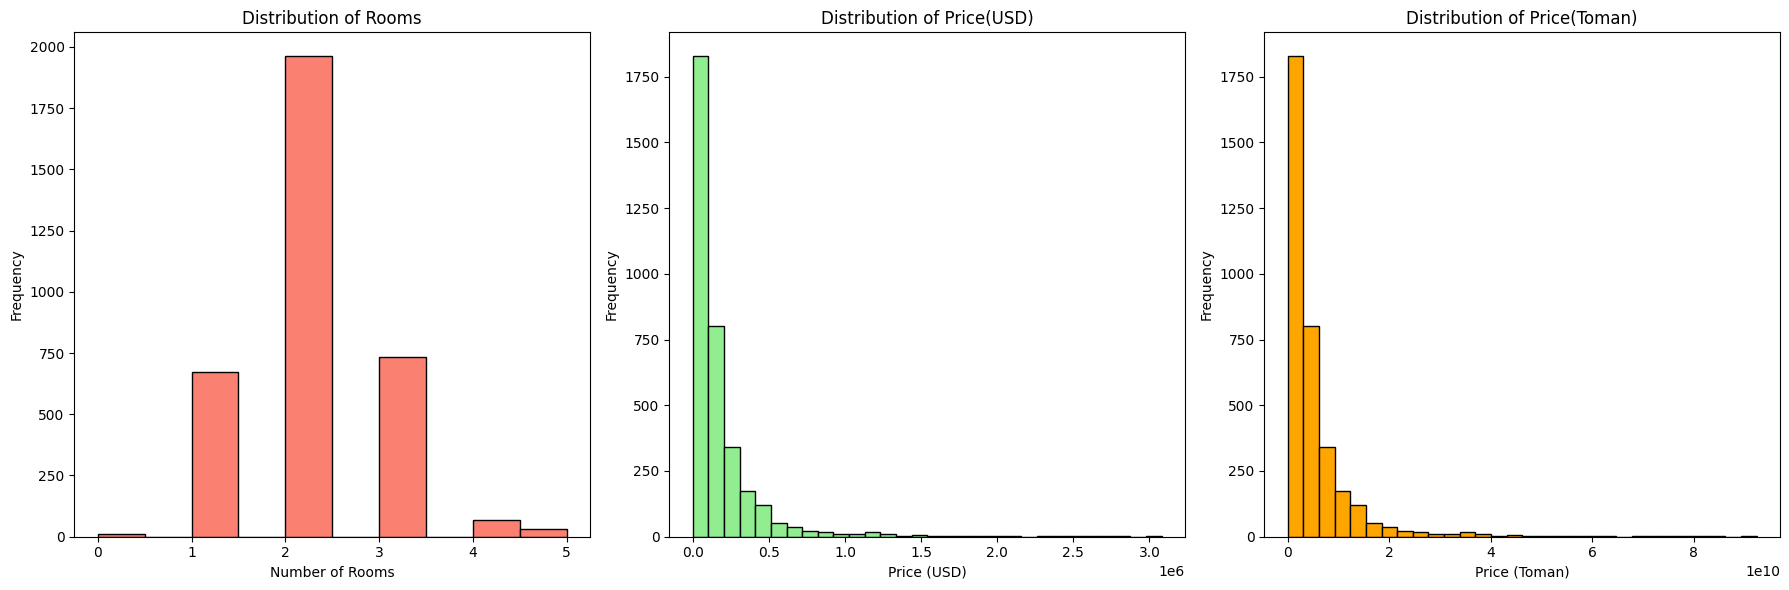

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].hist(df['Room'].dropna(), bins=10, color='salmon', edgecolor='black')
axs[0].set_title('Distribution of Rooms')
axs[0].set_xlabel('Number of Rooms')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['Price(USD)'].dropna(), bins=30, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribution of Price(USD)')
axs[1].set_xlabel('Price (USD)')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['Price(Toman)'].dropna(), bins=30, color='orange', edgecolor='black')
axs[2].set_title('Distribution of Price(Toman)')
axs[2].set_xlabel('Price (Toman)')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()